In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 8

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
Total params: 1,158
Trainable params: 1,158
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
22/31 [====================>.........] - ETA: 0s - loss: 2.0921 - accuracy: 0.0987 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 2s 20ms/step - loss: 2.0799 - accuracy: 0.1079 - val_loss: 2.0187 - val_accuracy: 0.2606
Epoch 2/1000
23/31 [=====================>........] - ETA: 0s - loss: 2.0089 - accuracy: 0.1590
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 9ms/step - loss: 1.9977 - accuracy: 0.1655 - val_loss: 1.9653 - val_accuracy: 0.3061
Epoch 3/1000
22/31 [====================>.........] - ETA: 0s - loss: 1.9512 - accuracy: 0.2262
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 10ms/step - loss: 1.9404 - accuracy: 0.2304 - val_loss: 1.8901 - val_accuracy: 0.3114
Epoch 4/1000
27/31 [=========================>....] - ETA: 0s - loss: 1.8687 - accuracy: 0.267

17/31 [===============>..............] - ETA: 0s - loss: 1.0579 - accuracy: 0.5616
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 9ms/step - loss: 1.0577 - accuracy: 0.5649 - val_loss: 0.7742 - val_accuracy: 0.8227
Epoch 29/1000
20/31 [==================>...........] - ETA: 0s - loss: 1.0491 - accuracy: 0.5816
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 10ms/step - loss: 1.0562 - accuracy: 0.5763 - val_loss: 0.7608 - val_accuracy: 0.8371
Epoch 30/1000
18/31 [================>.............] - ETA: 0s - loss: 1.0250 - accuracy: 0.5894
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 8ms/step - loss: 1.0100 - accuracy: 0.5973 - val_loss: 0.7330 - val_accuracy: 0.8205
Epoch 31/1000
29/31 [===========================>..] - ETA: 0s - loss: 1.0284 - accuracy: 0.5929
Epoch 3

28/31 [==========================>...] - ETA: 0s - loss: 0.8416 - accuracy: 0.6652
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 8ms/step - loss: 0.8373 - accuracy: 0.6657 - val_loss: 0.4316 - val_accuracy: 0.9629
Epoch 56/1000
16/31 [==============>...............] - ETA: 0s - loss: 0.8218 - accuracy: 0.6729
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 8ms/step - loss: 0.8080 - accuracy: 0.6794 - val_loss: 0.4338 - val_accuracy: 0.9576
Epoch 57/1000
14/31 [============>.................] - ETA: 0s - loss: 0.7918 - accuracy: 0.6847
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 8ms/step - loss: 0.7954 - accuracy: 0.6900 - val_loss: 0.4200 - val_accuracy: 0.9545
Epoch 58/1000
24/31 [======================>.......] - ETA: 0s - loss: 0.8027 - accuracy: 0.6852
Epoch 58

23/31 [=====================>........] - ETA: 0s - loss: 0.7692 - accuracy: 0.7028
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 11ms/step - loss: 0.7656 - accuracy: 0.7024 - val_loss: 0.3497 - val_accuracy: 0.9727
Epoch 83/1000
29/31 [===========================>..] - ETA: 0s - loss: 0.7528 - accuracy: 0.7042
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 8ms/step - loss: 0.7498 - accuracy: 0.7046 - val_loss: 0.3507 - val_accuracy: 0.9682
Epoch 84/1000
28/31 [==========================>...] - ETA: 0s - loss: 0.7133 - accuracy: 0.7148
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 12ms/step - loss: 0.7132 - accuracy: 0.7168 - val_loss: 0.3434 - val_accuracy: 0.9697
Epoch 85/1000
26/31 [========================>.....] - ETA: 0s - loss: 0.7279 - accuracy: 0.7130
Epoch 

15/31 [=============>................] - ETA: 0s - loss: 0.7105 - accuracy: 0.7214
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 9ms/step - loss: 0.7039 - accuracy: 0.7203 - val_loss: 0.3175 - val_accuracy: 0.9773
Epoch 110/1000
21/31 [===================>..........] - ETA: 0s - loss: 0.6883 - accuracy: 0.7359
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 6ms/step - loss: 0.7035 - accuracy: 0.7264 - val_loss: 0.3223 - val_accuracy: 0.9765
Epoch 111/1000
22/31 [====================>.........] - ETA: 0s - loss: 0.7111 - accuracy: 0.7333
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 6ms/step - loss: 0.7140 - accuracy: 0.7319 - val_loss: 0.3088 - val_accuracy: 0.9742
Epoch 112/1000
24/31 [======================>.......] - ETA: 0s - loss: 0.6985 - accuracy: 0.7406
Ep

Epoch 136/1000
23/31 [=====================>........] - ETA: 0s - loss: 0.6840 - accuracy: 0.7398
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 6ms/step - loss: 0.6907 - accuracy: 0.7372 - val_loss: 0.3020 - val_accuracy: 0.9712
Epoch 137/1000
25/31 [=======================>......] - ETA: 0s - loss: 0.6895 - accuracy: 0.7297
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.7281 - val_loss: 0.3004 - val_accuracy: 0.9750
Epoch 138/1000
28/31 [==========================>...] - ETA: 0s - loss: 0.6961 - accuracy: 0.7427
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 7ms/step - loss: 0.6891 - accuracy: 0.7451 - val_loss: 0.2934 - val_accuracy: 0.9705
Epoch 139/1000
15/31 [=============>................] - ETA: 0s - loss: 0.6873 - accu

Epoch 163/1000
17/31 [===============>..............] - ETA: 0s - loss: 0.6618 - accuracy: 0.7445
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 7ms/step - loss: 0.6641 - accuracy: 0.7471 - val_loss: 0.2904 - val_accuracy: 0.9826
Epoch 164/1000
21/31 [===================>..........] - ETA: 0s - loss: 0.6422 - accuracy: 0.7560
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 7ms/step - loss: 0.6505 - accuracy: 0.7486 - val_loss: 0.2909 - val_accuracy: 0.9818
Epoch 165/1000
20/31 [==================>...........] - ETA: 0s - loss: 0.6580 - accuracy: 0.7500
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 7ms/step - loss: 0.6711 - accuracy: 0.7466 - val_loss: 0.2813 - val_accuracy: 0.9811
Epoch 166/1000
21/31 [===================>..........] - ETA: 0s - loss: 0.6769 - accu

Epoch 190/1000
26/31 [========================>.....] - ETA: 0s - loss: 0.6577 - accuracy: 0.7515
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6547 - accuracy: 0.7547 - val_loss: 0.2700 - val_accuracy: 0.9803
Epoch 191/1000
22/31 [====================>.........] - ETA: 0s - loss: 0.6616 - accuracy: 0.7454
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6602 - accuracy: 0.7466 - val_loss: 0.2699 - val_accuracy: 0.9795
Epoch 192/1000
24/31 [======================>.......] - ETA: 0s - loss: 0.6400 - accuracy: 0.7529
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6478 - accuracy: 0.7484 - val_loss: 0.2726 - val_accuracy: 0.9780
Epoch 193/1000
28/31 [==========================>...] - ETA: 0s - loss: 0.6334 - accu

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 2ms/step - loss: 0.2682 - accuracy: 0.9856


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 128ms/step
[5.0114673e-01 1.7556046e-04 6.3186003e-06 1.9368526e-02 1.9863495e-03
 3.7330669e-01 9.9519990e-02 4.4899201e-03]
0


# Confusion matrix

42/42 [==============================] - 0s 1ms/step


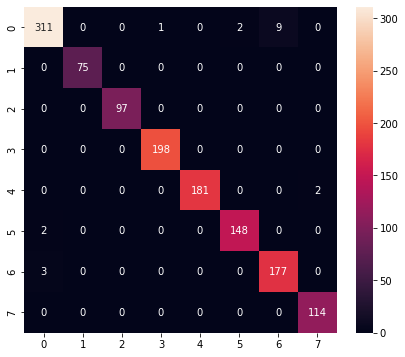

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       323
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        97
           3       0.99      1.00      1.00       198
           4       1.00      0.99      0.99       183
           5       0.99      0.99      0.99       150
           6       0.95      0.98      0.97       180
           7       0.98      1.00      0.99       114

    accuracy                           0.99      1320
   macro avg       0.99      0.99      0.99      1320
weighted avg       0.99      0.99      0.99      1320



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\RESHMA~1\AppData\Local\Temp\tmpof7oxnek\assets


6720

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.0114673e-01 1.7556013e-04 6.3185876e-06 1.9368496e-02 1.9863453e-03
 3.7330663e-01 9.9520020e-02 4.4899196e-03]
0
